<a href="https://colab.research.google.com/github/UmatmU/UmatmU.GitHub.io/blob/gh-pages/Thesis_project_Pyccl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Run this command twice

!pip install -q condacolab

import condacolab

condacolab.install()

!conda install --no-pin pyccl

import pyccl

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [ ]:
#If this prints '3.0.0', everything is working.
pyccl.__version__

'3.0.2'

In [ ]:
# Running the program of baryon modules
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pyccl as ccl

In [ ]:
# cosmology_vanilla = ccl.CosmologyVanillaLCDM()  # cosmology object
k = np.logspace(-3, 1, 100)  # wavenumber (start, end, #pt); -3 means 10^-3
a = 1.  # scale factor a, i.e., z=0

# pk_nonlin = ccl.nonlin_matter_power(cosmology_vanilla, k, a)

# To check Lewandowski's eqn(5.5)
cosmo = ccl.Cosmology(Omega_c=0.2265, Omega_b=0.0455, h=0.704, sigma8=0.81 , n_s=0.967) # WMAP7 cosmology from vanDaalen 2019
pk_lin = ccl.linear_matter_power(cosmo, k, a)
kNL1 = ccl.kNL(cosmo, a, p_of_k_a='delta_matter:delta_matter')

print(kNL1)

# command + /: make block comment
# k_NL = 4.3
# k_nl = 1.73 # k_NL for k<k_tr=0.22
# n_l = -2.1 # n for k>k_tr=0.22
# n_s = -1.7 # n for k<k_tr=0.22
# pk_lin_pl = (2*np.pi)**3*(1/(k_nl**3))*(k/k_nl)**n_s

# vd = ccl.baryons.BaryonsvanDaalen19(fbar=0.8)  # Baryonic boost factor model of Van Daalen 2019
# boost_pk_vd = vd.include_baryonic_effects( # vd: include the effects of vd on the non-linear matter power spectrum
#    cosmo=cosmology_vanilla,
#     pk=cosmology_vanilla.get_nonlin_power() # pk:power spectrum
# )
# returns Pk2D:A power spectrum class holding the information needed to reconstruct an arbitrary function of wavenumber and scale factor.
# pk_vd = boost_pk_vd(k, a)


0.11644545210770434


Plot graph to check Lewandowski's eqn(5.5),


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


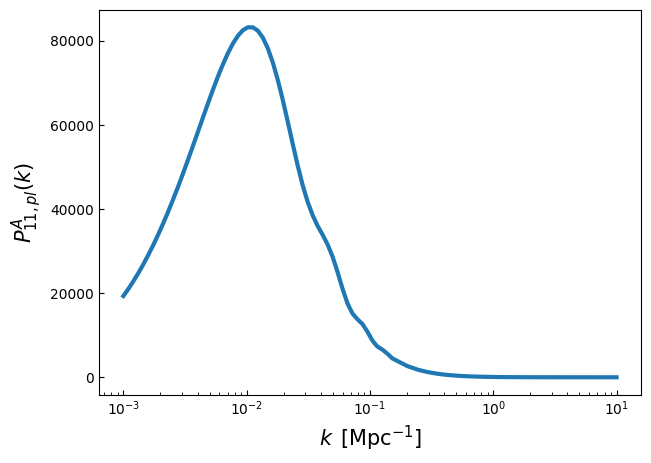

k_tr =  0.010235310218990263


In [ ]:
# Set the figure size
plt.figure(figsize=(7, 5))
# Add the reference line for pk_nonlin / pk_nonlin = 1
#plt.semilogx(k, [1]*len(k), c="darkgray", lw=2.5)  # Using darkgray color for the reference line;  lw=line width
#plt.semilogx(k, pk_vd/pk_nonlin,  lw=3) # semilogx: change the x-axis to log scaling, e.g. 10^n
plt.semilogx(k, pk_lin,  lw=3) # to check Lewandowski's eqn(5.5)

# Setting the properties for ticks, labels, and legend
plt.gca().tick_params(direction='in', which='both') # draw the linegrid in axis; gca:get current axes
plt.xlabel("$k \: \: \mathrm{[Mpc^{-1}]}$", fontsize=15)
plt.ylabel("$P^A_{11,pl} (k)$", fontsize=15) # the linear power spectrum in a piecewise power law

# Change y-axis labels to standard notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.legend(frameon=False, fontsize=15)
plt.show()

# Print k_tr
ymax = pk_lin.max()
xmax = k[np.argmax(pk_lin)]
print("k_tr = ", xmax)

Plot the figure for fbar_200c and Deltac^2.

In [ ]:
import pandas as pd

# Prefactor fbar200c from vanDaalen's paper
df = pd.read_csv('/barfractions_200c_openaccess.dat', delim_whitespace=True)
# The last row is dropped out so that the print(fbar200c.mean()) gives the fbar200c ~ 0.62 as shown in paper
# '/powtable_BAHAMAS_nu0.06_Planck2015.dat' is dropped out as it's reduction is mainly caused by neutrinos effect
df1 = ((df.drop(3)).drop(22)).drop(12)
fbar200c = pd.Series(df1['<fbar>']/df1['Ob/Om']).to_numpy(dtype ='float64')

# array = ['a','b']['A','B']; array[0][1] is the second item of the first list, i.e, [list][item] = b
# powtable = [AGN_7p6_nu0_WMAP9_L400N1024, AGN_8p0_nu0_WMAP9_L400N1024, AGN_Planck_L400N1024, AGN_TUNED_nu0_Planck_L400N1024,
#             AGN_TUNED_nu0_WMAP9_L100N512, AGN_TUNED_nu0_WMAP9_L400N1024, AGN_Theat_8p3_WMAP7_L400N1024, AGN_Theat_8p5_Planck_L400N1024, AGN_Theat_8p5_WMAP7_L400N1024,
#             AGN_Theat_8p7_Planck_L400N1024, AGN_Theat_8p7_WMAP7_L400N1024, AGN_WMAP7_L400N1024, NOCOOL_UVB_Planck_L400N1024, NOCOOL_UVB_WMAP7_L400N1024,
#             REF_Planck_L400N1024, REF_WMAP7_L400N1024, EAGLE, Illustris, TNG100, TNG300]
powtable = [['/powtable_BAHAMAS_Theat7.6_nu0_WMAP9.dat','/powtable_BAHAMAS_Theat8.0_nu0_WMAP9.dat','/powtable_C-OWLS_AGN_Planck2013.dat','/powtable_BAHAMAS_nu0_Planck2013.dat',
             '/powtable_BAHAMAS_nu0_WMAP9_L100N512.dat','/powtable_BAHAMAS_nu0_WMAP9.dat','/powtable_C-OWLS_AGN_Theat8.3_WMAP7.dat','/powtable_C-OWLS_AGN_Theat8.5_Planck2013.dat','/powtable_C-OWLS_AGN_Theat8.5_WMAP7.dat',
             '/powtable_C-OWLS_AGN_Theat8.7_Planck2013.dat','/powtable_C-OWLS_AGN_Theat8.7_WMAP7.dat','/powtable_C-OWLS_AGN_WMAP7.dat','/powtable_C-OWLS_NOCOOL_UVB_Planck2013.dat','/powtable_C-OWLS_NOCOOL_UVB_WMAP7.dat',
             '/powtable_C-OWLS_REF_Planck2013.dat','/powtable_C-OWLS_REF_WMAP7.dat','/powtable_EAGLE_REF.dat','/powtable_Illustris-1.dat','/powtable_TNG100-1.dat','/powtable_TNG300-1.dat'],
            ['/powtable_DMONLY_2fluid_nu0_WMAP9_L400N1024.dat','/powtable_DMONLY_2fluid_nu0_WMAP9_L400N1024.dat','/powtable_DMONLY_Planck2013_L400N1024.dat','/powtable_DMONLY_2fluid_nu0_Planck2013_L400N1024.dat',
             '/powtable_DMONLY_2fluid_nu0_WMAP9_L100N512.dat','/powtable_DMONLY_2fluid_nu0_WMAP9_L400N1024.dat','/powtable_DMONLY_WMAP7_L400N1024.dat','/powtable_DMONLY_Planck2013_L400N1024.dat','/powtable_DMONLY_WMAP7_L400N1024.dat',
             '/powtable_DMONLY_Planck2013_L400N1024.dat','/powtable_DMONLY_WMAP7_L400N1024.dat','/powtable_DMONLY_WMAP7_L400N1024.dat','/powtable_DMONLY_Planck2013_L400N1024.dat','/powtable_DMONLY_WMAP7_L400N1024.dat',
             '/powtable_DMONLY_Planck2013_L400N1024.dat','/powtable_DMONLY_WMAP7_L400N1024.dat','/powtable_EAGLE_DMONLY_L100N1504.dat','/powtable_Illustris-1-DM.dat','/powtable_TNG100-1-DM.dat','/powtable_TNG300-1-DM.dat']]


ratio = [None]*len(powtable[0]); k = [None]*len(powtable[0])
for i in range(len(powtable[0])):
  df_b = pd.read_csv(powtable[0][i], delim_whitespace=True)
  df_dm = pd.read_csv(powtable[1][i], delim_whitespace=True)
  P_b = df_b.loc[df_b['k[h/Mpc]']<=0.31].loc[df_b['#z']==0].loc[:,df_b.columns[2]] # P(k) of baryon for z=0 and k<=0.31
  P_dm = df_dm.loc[df_dm['k[h/Mpc]']<=0.31].loc[df_dm['#z']==0].loc[:,df_dm.columns[2]] # P(k) of dark matter for z=0 and k<=0.31
  # pd.Series().to_numpy(dtype ='float64') is used to convert it into array
  ratio[i] = pd.Series(P_b).to_numpy(dtype ='float64') / P_dm
  k[i] = df_b.loc[df_b['k[h/Mpc]']<=0.31].loc[df_b['#z']==0].loc[:,df_b.columns[1]]

# print(ratio[20])
# print(k)

# a = 2*(2*np.pi)

# # For AGN_Theat_9p0_WMAP7_L400N1024  !!not found
# df26 = pd.read_csv('/powtable_C-OWLS_AGN_Theat8.7_WMAP7.dat', delim_whitespace=True)
# df27 = pd.read_csv('/powtable_DMONLY_WMAP7_L400N1024.dat', delim_whitespace=True)
# ratio13 = df26.loc[4928:4991,df26.columns[2]]/df27.loc[4928:4991,df27.columns[2]]
# k13 = df26.loc[4928:4991,df26.columns[1]] # for k<1h/Mpc


Plot the figure of ratio verses k.

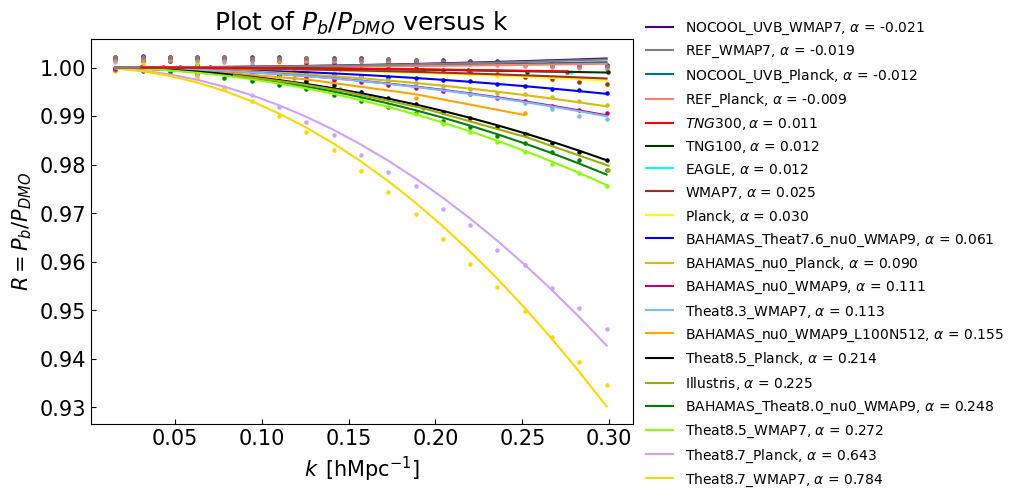

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors

# The reduced ratio function
def f(k,n):
  return 1-n*k**2

# Set the figure size
plt.figure(figsize=(7, 5))

# color = ['blue','green','yellow','mustard',
#          'orange','magenta','skyblue','black','lime green',
#          'lilac','gold','brown','sea blue','indigo',
#          'salmon','grey','aqua','puke green','dark green','red']
colors = ['blue','green','yellow','#d2bd0a',
          'orange','#c20078','#75bbfd','black','#89fe05',
          '#cea2fd','gold','brown','#047495','indigo',
          'salmon','grey','aqua','#9aae07','#033500','red']
labels = [r'BAHAMAS_Theat7.6_nu0_WMAP9, $\alpha$ = %.3f',r'BAHAMAS_Theat8.0_nu0_WMAP9, $\alpha$ = %.3f',r'Planck, $\alpha$ = %.3f',r'BAHAMAS_nu0_Planck, $\alpha$ = %.3f',
          r'BAHAMAS_nu0_WMAP9_L100N512, $\alpha$ = %.3f',r'BAHAMAS_nu0_WMAP9, $\alpha$ = %.3f',r'Theat8.3_WMAP7, $\alpha$ = %.3f',r'Theat8.5_Planck, $\alpha$ = %.3f',r'Theat8.5_WMAP7, $\alpha$ = %.3f',
          r'Theat8.7_Planck, $\alpha$ = %.3f',r'Theat8.7_WMAP7, $\alpha$ = %.3f',r'WMAP7, $\alpha$ = %.3f',r'NOCOOL_UVB_Planck, $\alpha$ = %.3f',r'NOCOOL_UVB_WMAP7, $\alpha$ = %.3f',
          r'REF_Planck, $\alpha$ = %.3f',r'REF_WMAP7, $\alpha$ = %.3f',r'EAGLE, $\alpha$ = %.3f',r'Illustris, $\alpha$ = %.3f',r'TNG100, $\alpha$ = %.3f',r'$TNG300, \alpha$ = %.3f']

popt = [None]*len(powtable[0])
for i in range(len(powtable[0])):
  plt.scatter(k[i],ratio[i],s=5,color=colors[i])
  popt[i], _ = curve_fit(f, k[i], ratio[i]) # popt: optimal/coefficient value; pcov:2D-array,the estimated approximate covariance of popt
  plt.plot(k[i], f(k[i], *popt[i]), color=colors[i], label=labels[i] % tuple(popt[i]))

# Setting the properties for ticks, labels, title and legend
plt.gca().tick_params(direction='in', which='both', labelsize=15) # draw the linegrid in axis; gca:get current axes
plt.xlabel("$k \: \: \mathrm{[h Mpc^{-1}]}$", fontsize=15)
plt.ylabel("$R = P_{b}/P_{DMO}$", fontsize=15)
plt.title('Plot of $P_{b}/P_{DMO}$ versus k', fontsize=18)

# Change y-axis labels to standard notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Specify order of items in legend
order = [None]*len(powtable[0])
a = popt

for i in range(len(powtable[0])):
  order[i] = a.index(min(a))
  a = [100 if x==min(a) else x for x in a] # remove and replace the min in list with 100, so to find the 2nd min

# Add legend to plot
plt.legend([handles[i] for i in order],[labels[i] for i in order], frameon=False, loc='lower left', fontsize=10, bbox_to_anchor=(1,-0.2))
plt.show()

In [ ]:
# Set the figure size
plt.figure(figsize=(7, 5))

# Stored all the slope into alpha
# Another way to convert list(where elements are array) to array: alpha = [arr[0] for arr in popt]
alpha = np.concatenate(popt, axis=0)
omega_b = pd.Series(df1['Ob/Om']).to_numpy(dtype ='float64')  # omega_b = Omega_b/Omega_m
dcbarsqd = alpha/(4*np.pi*omega_b)

# Drop out data points for fbar < 0.4
fbar = np.delete(fbar200c, np.where(fbar200c < 0.4))
alfa = np.delete(alpha, np.where(fbar200c < 0.4))
o_b = np.delete(omega_b, np.where(fbar200c < 0.4))
dcbar2 = alfa/(4*np.pi*o_b)

AA = (2**2.111+2**0.0038*(1.371*fbar)**(0.0038-2.111))*np.exp(-5.816*fbar-0.4005)/(4*np.pi*o_b)

# Plot the delta_cbar^2 vs fbar
A, B = np.polyfit(fbar, dcbar2, 1)
plt.scatter(fbar, dcbar2,s=5)
plt.plot(fbar, A*fbar+B, label ='slope = %.3f'%A)
plt.plot(fbar, AA, 'ro',label ='Full expression')

# # Check each variables
# print('The slope is', A)
# print('The x data points(fbar):\n', fbar200c)
# print('alpha:\n', alpha)
# print('omega_b:\n', omega_b)
# print('The y data points(dcbar2):\n', dcbarsqd)

# Calculation of dcbar2 for WMAP7
print('The following results are from', powtable[0][11])
print('The dcbar2 of WMAP7 is (without P1loop): ', dcbarsqd[11])
P1loop = pd.read_csv('/content/p1loop_uma.dat', delim_whitespace=True) # Plinear + P1loop for WMAP7 in k = 0.01 - 0.7 h/mpc roughly
k1loop = pd.read_csv('/content/k1loop.dat', delim_whitespace=True)

cosmo = ccl.Cosmology(Omega_c=0.2265, Omega_b=0.0455, h=0.704, sigma8=0.81 , n_s=0.967) # WMAP7 cosmology from vanDaalen 2019
k_arr = np.logspace(-3, -1, 50)  # k = 0.01-1
Plin = ccl.linear_matter_power(cosmo, k_arr, 1.)
kNL1 = ccl.kNL(cosmo, 1., p_of_k_a='delta_matter:delta_matter')
# dcbarsqd2 = alpha/(4*np.pi*omega_b*(1-P1loop.to_numpy().mean()/Plin.mean()))
print('P1loop = ', P1loop.to_numpy().mean())
print('P11 = ', Plin.mean())
print('The dcbar2 of WMAP7 is (with P1loop): ', dcbarsqd2[11])
print(kNL1)
print(dcbarsqd2[11]/kNL1**2)
print(P1loop)

# Setting the properties for ticks, labels, and legend
plt.gca().tick_params(direction='in', which='both') # draw the linegrid in axis; gca:get current axes
plt.xlabel(r"$\tilde{f}_{bar}$", fontsize=15)
plt.ylabel(r"$\Delta \tilde{\overline{c}}^2_A \: \: \mathrm{[Mpc/h^2]}$", fontsize=15)
plt.title('Plot of 'r'$\Delta \tilde{\overline{c}}^2_A$'' versus 'r'$\tilde{f}_{bar}$', fontsize=18)

# Change y-axis labels to standard notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.legend(frameon=False, fontsize=15)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-100-848a51dbea14>, line 36)

TypeError: not all arguments converted during string formatting

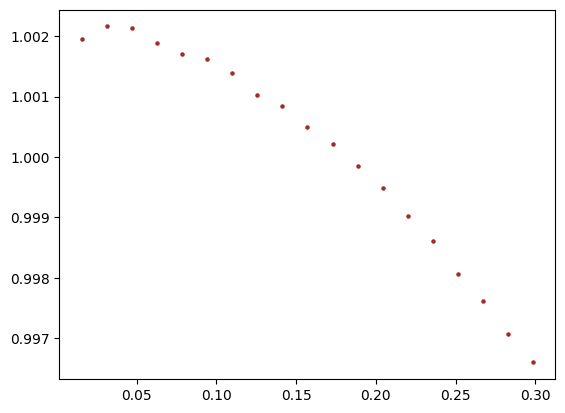

In [ ]:
# The reduced ratio function
def f(k,n):
  return 1-n*k**2

i = 11
plt.scatter(k[i],ratio[i],s=5,color=colors[i])
popt[i], _ = curve_fit(f, k[i], ratio[i]) # popt: optimal/coefficient value; pcov:2D-array,the estimated approximate covariance of popt
plt.plot(k[i], f(k[i], *popt[i]), color=colors[i], label=labels[i] % tuple(popt[i]))
plt.ployt(k, 1-P1loop.to_numpy()/Plin
plt.show()

Plot the P_b/P_dm vs k figure for Mead's halo model.


In [ ]:
import numpy as np
import pyccl as ccl
import pylab as plt
import matplotlib.cm as cm
from scipy import integrate
from scipy import interpolate
from functools import partial
%matplotlib inline

In [ ]:
# Cosmology
cosmo = ccl.Cosmology(Omega_c=0.196, Omega_b=0.042, h=0.73, sigma8=0.74, n_s=0.951)
# Omega_c=0.2265, Omega_b=0.0455, h=0.704, sigma8=0.81 , n_s=0.967) # WMAP7 cosmology from vanDaalen 2019

# size of k
kmin = 1E-2; kmax = 1
# Wavenumbers
k_arr = np.geomspace(kmin,kmax,256)  # np.geomspace() similar to np.logspace(), but with endpoints specified directly; e.g. np.geomspace(1, 256, num=4), output: array([(256)^(0/3), (256)^(1/3), (256)^(2/3), 256]). remarks: for pt. start from non-one # e.g. np.geomspace(1E-2,1,4), just shift the starting pt to one, output: [0.01*0.01^(-0/3), 0.01*0.01^(-1/3), 0.01*0.01^(-2/3) , 0.01*0.01^(-3/3)]

# Scale factor
a_sf=1

# We will use a mass definition with Delta = 200 times the matter density
hmd_200m = ccl.halos.MassDef(200, 'matter')
# The Tinker 2008 mass function
hmf_200m = ccl.halos.MassFuncTinker08(mass_def=hmd_200m, mass_def_strict=False)
# The Tinker 2010 halo bias
hbf = ccl.halos.HaloBiasTinker10(mass_def=hmd_200m, mass_def_strict=False)
# The Duffy 2008 concentration-mass relation
cM = ccl.halos.ConcentrationDuffy08(mass_def=hmd_200m)
# The NFW profile to characterize the matter density around halos
pM = ccl.halos.HaloProfileNFW(mass_def=hmd_200m, concentration=cM)
hmc = ccl.halos.HMCalculator(mass_function=hmf_200m, halo_bias=hbf,mass_def=hmd_200m)
print(hmd_200m)
# Define some useful densities
rho_m = cosmo['Omega_m']*ccl.physical_constants.RHO_CRITICAL*cosmo['h']**2
rho_DM = cosmo['Omega_c']*ccl.physical_constants.RHO_CRITICAL*cosmo['h']**2
rho_g = rho_m - rho_DM

#For the gas mass fraction within halos
m_0g = 1E12/cosmo['h']
sigmag = 3

#For the gas profile
beta = 2.9

#Parameters that inform the power spectrum of the gas,
#specifically the extended component.
Fg = 0.05 #this is an example, it should be <<1
bd = 0.85 #from Fedeli

# A reference halo mass that will be used later
mhalo = 1E14/cosmo['h']

# Array of masses
mmin_DM=1E6
mmax_DM=1E16
mmin_gas=m_0g
mmax_gas=mmax_DM
m_arr = np.geomspace(mmin_DM,mmax_DM,128)

MassDef(Delta=200, rho_type=matter)


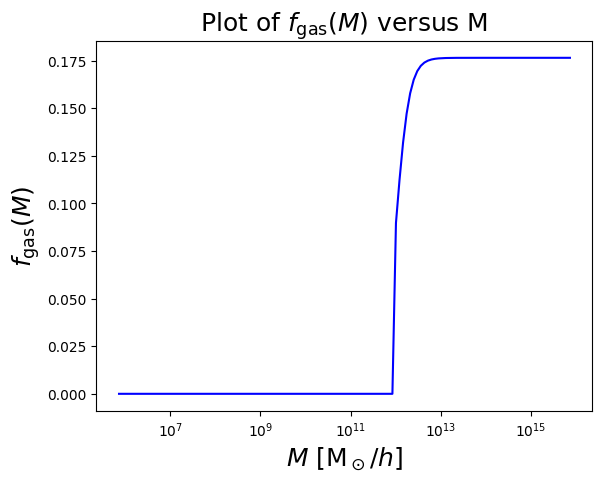

In [ ]:
def f_gas(m):
    fgas = []
    for i in m:
        if i<m_0g:
            fgas.append(0.)
        else:
            fgas.append((cosmo['Omega_b']/cosmo['Omega_m'])*(i/m_0g)**beta/(1+(i/m_0g)**beta)) # fitting parameter beta>0
    return fgas

plt.figure()
plt.plot(m_arr*cosmo['h'],f_gas(m_arr), 'b-')
plt.xscale('log')
plt.xlabel(r'$M$ $[$M$_\odot/h]$',fontsize=18)
plt.ylabel(r'$f_{\rm gas}(M)$',fontsize=18)
plt.title('Plot of ' r'$f_{\rm gas}(M)$ versus M',fontsize=18)
plt.show()

In [ ]:
#Interpolate the profiles for speed
row = 150; col = 2000
M = np.logspace(np.log10(mmin_DM),np.log10(mmax_DM),num=row)  # list of DM masses spreaded by log-spacing; np.logspace(start,stop,num) e.g. np.logspace(2.0,3.0,num=4), output: array([10^2, 10^(2+1/3), 10^(2+2/3), 10^3])
yDM=np.zeros((row,col))
M2D = np.zeros((row,col))  # store the list of masses repeatedly in multiple columns
for i in range(0,col):
    M2D[:,i]=M
K = np.linspace(kmin,kmax,num=col)  # e.g. np.linspace(2.0, 3.0, num=5), output: array([2., 2.25, 2.5, 2.75, 3.])
for j in range(0,row):
    yDM[j,:]=pM.fourier(cosmo, K, M[j], a_sf)/M[j]
fDM = interpolate.interp2d(M,K,np.transpose(yDM))
print("DM profiles interpolated...\n")

# Halo Mass Calculator (for DM)
hmc = ccl.halos.HMCalculator(mass_function=hmf_200m, halo_bias=hbf, mass_def=hmd_200m)

# Generic integrals needed
# From Mead (2020)
def integrandDM(m,k,prof1):
    dndlog10m = hmf_200m(cosmo, m, a_sf)
    dndm=dndlog10m/(m*np.log(10.))
    bm = hbf(cosmo,m,a_sf)
    W = prof1(m,k)
    return dndm*bm*W*m
def integratedDM(mmin,mmax,k,p1):
    return integrate.quad(integrandDM, mmin, mmax, args=(k,p1),epsabs=0,epsrel=1E-4,limit=5000)[0]

# def integrandGENbp(m,k,prof1):
#     bm = hbf(cosmo,m,a_sf)
#     dndlog10m = hmf_200m(cosmo, m, a_sf)
#     dndm=dndlog10m/(m*np.log(10.))
#     y=prof1(m,k)
#     return dndm*m*bm*y
# def integratedGENbp(mmin,mmax,k,p1):
#     return integrate.quad(integrandGENbp, mmin, mmax, args=(k,p1),epsabs=0,epsrel=1E-3,limit=5000)[0]

def f_g(m):
    if m<m_0g:
      fg=0
    else:
      fg=(cosmo['Omega_b']/cosmo['Omega_m'])*(m/m_0g)**beta/(1+(m/m_0g)**beta) # fitting parameter beta>0
    return fg

def integrandB(m,k,prof1):
    dndlog10m = hmf_200m(cosmo, m, a_sf)
    dndm=dndlog10m/(m*np.log(10.))
    bm = hbf(cosmo,m,a_sf)
    Wb = prof1(m,k)*(f_g(m))
    return dndm*bm*Wb*m

def integratedB(mmin,mmax,k,p1):
    return integrate.quad(integrandB, mmin, mmax, args=(k,p1),epsabs=0,epsrel=1E-4,limit=5000)[0]

# power spectrum, PDM2h for DM; PB2h for baryon
# def PDM2h(k):
#     return ccl.linear_matter_power(cosmo, k, a_sf)*integratedGENbp(mmin_DM,mmax_DM,k,fDM)**2

def PDM2h(k):
    return ccl.linear_matter_power(cosmo, k, a_sf)*integratedDM(mmin_DM,mmax_DM,k,fDM)**2

def PB2h(k):
    return ccl.linear_matter_power(cosmo, k, a_sf)*(integratedB(mmin_gas,mmax_DM,k,fDM)+cosmo['Omega_c']/cosmo['Omega_m']*integratedDM(mmin_DM,mmax_DM,k,fDM))**2

PDM2h_arr=np.zeros(len(k_arr))
PB2h_arr=np.zeros(len(k_arr))
for i in range(0,len(k_arr)):
    PDM2h_arr[i]=PDM2h(k_arr[i])
    PB2h_arr[i]=PB2h(k_arr[i])

<ipython-input-108-6cceacd2df87>:11: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fDM = interpolate.interp2d(M,K,np.transpose(yDM))
<ipython-input-108-6cceacd2df87>:23: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`C

DM profiles interpolated...



<ipython-input-108-6cceacd2df87>:48: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  Wb = prof1(m,k)*(f_g(m))


5.559214326100422e+25
71904.13274168351


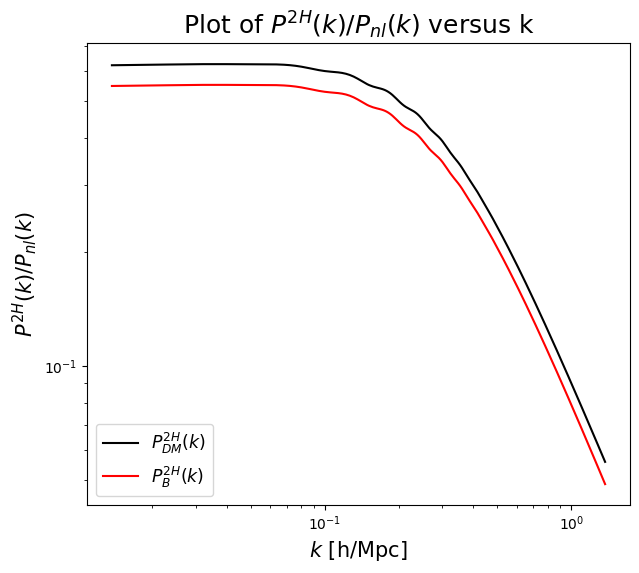

In [109]:
# Non-linear matter power spectrum, for comparison
pk_nl = ccl.nonlin_matter_power(cosmo, k_arr, a_sf)

plt.figure(figsize=(7,6))

# Plot for the ratio P_DM/P_nl and P_b/P_nl of 2-halo
plt.plot(k_arr/cosmo['h'], (1/rho_m)**2*PDM2h_arr/pk_nl, 'k-', label='$P_{DM}^{2H}(k)$')
plt.plot(k_arr/cosmo['h'], (1/rho_m)**2*PB2h_arr/pk_nl, 'r-', label='$P_{B}^{2H}(k)$')

print(PDM2h_arr[20])
print(pk_nl[20])

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left', fontsize=12.5)
plt.ylabel(r'$P^{2H}(k)/P_{nl}(k)$', fontsize=15)
plt.xlabel(r'$k\,\,[{\rm h/Mpc}]$', fontsize=15)
plt.title('Plot of $P^{2H}(k)/P_{nl}(k)$ versus k',fontsize=18)

plt.show()

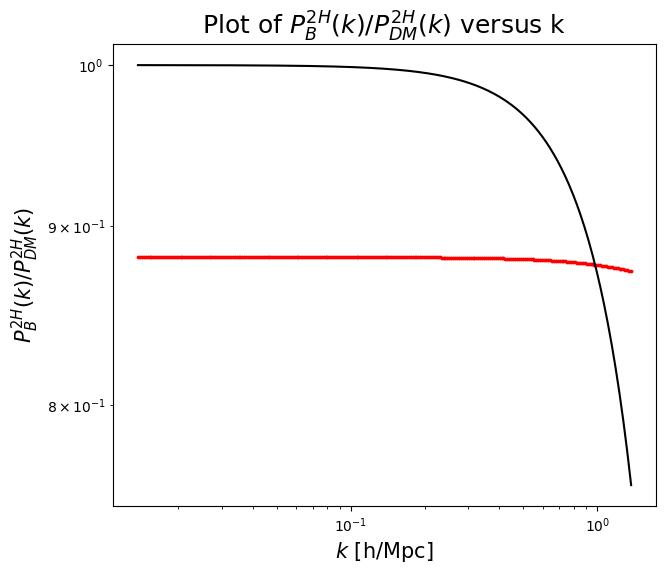

In [111]:
from scipy.optimize import curve_fit

# The reduced ratio function
def f(k,n):
  return 1-n*k**2

plt.figure(figsize=(7,6))

# # Plot for the ratio P_b/P_DM of 2-halo
# plt.plot(k_arr/cosmo['h'], PB2h_arr/PDM2h_arr, 'k-')

# Fit the curve
plt.scatter(k_arr/cosmo['h'], PB2h_arr/PDM2h_arr, s=3, color='r')
popt, _ = curve_fit(f, k_arr/cosmo['h'], PB2h_arr/PDM2h_arr) # popt: optimal/coefficient value
plt.plot(k_arr/cosmo['h'], f(k_arr/cosmo['h'], *popt), color='black', label='Slope of ratio/k = %.3f' % tuple(popt))

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$P_{B}^{2H}(k)/P_{DM}^{2H}(k)$', fontsize=15)
plt.xlabel(r'$k\,\,[{\rm h/Mpc}]$', fontsize=15)
plt.title('Plot of $P_{B}^{2H}(k)/P_{DM}^{2H}(k)$ versus k', fontsize=18)

plt.show()